# Cluster by accessory gene expression

This notebook is visualizing the PAO1 and PA14 compendia that we will be using in our analysis ...

In [1]:
import os
import pandas as pd
import plotnine as pn
from core_acc_modules import paths_explore, utils

## Load data

In [2]:
## TO DO
# add description for how data was generated, point to Georgia's repo
# Not sure yet where this data will permanently be stored. but there are plans to share it

# Read in expression data files 
# Raw transcriptome data was downloaded from SRA
# Raw data was quantified using Salmon a Georgia Doing (Hogan Lab)

pao1_expression_filename = paths_explore.PAO1_GE
pa14_expression_filename = paths_explore.PA14_GE

# Read in table mapping sample id to strain name
sample_to_strain_filename = paths_explore.SAMPLE_TO_STRAIN

In [3]:
# Load expression data
# Matrices will be sample x gene after taking the transpose
pao1_expression = pd.read_csv(
    pao1_expression_filename,
    index_col=0, 
    header=0, 
    usecols=lambda c:c != 'Unnamed: 0').T

pa14_expression = pd.read_csv(
    pa14_expression_filename, 
    index_col=0, 
    header=0, 
    usecols=lambda c:c != 'Unnamed: 0').T

In [4]:
print(pao1_expression.shape)
pao1_expression.head()

(2852, 5563)


Name,PA0001,PA0002,PA0003,PA0004,PA0005,PA0006,PA0007,PA0008,PA0009,PA0010,...,PA1905,PA0195,PA4812,PA0195.1,PA0457.1,PA1552.1,PA1555.1,PA3701,PA4724.1,PA5471.1
ERX541571/ERX541571.salmon,186.695122,41.039911,52.686904,42.559606,11.827122,49.681780,15.112466,18.976053,39.794426,7.900165,...,0.0,5.164847,8.341849,2.249546,16.787212,35.897737,35.380105,117.820814,133.373023,0.000000
ERX541572/ERX541572.salmon,200.587013,36.649969,65.542546,40.107206,15.097534,38.910338,9.278816,13.337423,35.813993,4.297894,...,0.0,4.027646,8.112304,2.135635,13.547155,21.003204,26.663490,109.514577,99.292904,0.000000
ERX541573/ERX541573.salmon,111.420301,27.414821,56.013724,25.265883,18.695233,22.617726,7.280330,8.250733,22.800384,2.722965,...,0.0,3.555782,8.703870,2.632177,20.652900,13.542210,33.171792,47.431690,34.109493,0.000000
ERX541574/ERX541574.salmon,143.320052,34.477270,83.451742,39.379652,23.225823,30.078262,12.387823,11.166558,26.434305,7.745614,...,0.0,7.795966,9.475629,4.120492,16.637283,15.078365,24.854482,97.881433,36.514635,5.005125
ERX541575/ERX541575.salmon,118.398324,34.014014,73.732421,32.213593,21.246915,23.149103,6.744427,13.006638,33.648941,4.743275,...,0.0,5.569379,9.570548,2.452301,32.672677,8.081175,47.486374,66.633501,26.299912,0.000000


In [5]:
print(pa14_expression.shape)
pa14_expression.head()

(2852, 5891)


Name,PA14_55610,PA14_55600,PA14_55590,PA14_55580,PA14_55570,PA14_55560,PA14_55550,PA14_55540,PA14_55530,PA14_55520,...,PA14_19205,PA14_17675,PA14_67975,PA14_36345,PA14_43405,PA14_38825,PA14_24245,PA14_28895,PA14_55117,PA14_59845
ERX541571/ERX541571.salmon,7.649000,5.199463,0.000000,0.603840,3.251456,2.072430,4.737410,9.295218,14.782939,0.799833,...,12.961391,59.317551,216.061670,15.634424,62.094500,12.247810,485.022917,7.891714,20.544727,0.0
ERX541572/ERX541572.salmon,9.079935,5.327690,1.818162,2.992955,8.575610,2.013074,2.627950,11.847593,20.802754,1.046103,...,22.146118,83.642721,201.194838,21.102779,90.796112,77.917983,643.011166,13.042572,18.063102,0.0
ERX541573/ERX541573.salmon,8.198436,5.348838,5.746934,6.514637,4.442881,4.598464,1.409910,11.535072,15.801185,3.560806,...,22.562531,113.387292,140.009994,8.235107,17.632431,75.567561,989.102490,15.962813,11.427848,0.0
ERX541574/ERX541574.salmon,10.230230,1.517369,2.205433,3.784424,2.168788,4.430326,2.523129,9.354983,18.892611,2.666143,...,28.663954,120.056313,179.670570,8.442577,20.247037,72.908551,1107.972700,24.730362,28.145352,0.0
ERX541575/ERX541575.salmon,8.835363,5.100128,2.704275,7.348352,4.388744,3.053679,0.652771,7.405350,11.497184,1.663036,...,14.601112,125.628568,111.880470,7.184447,16.427163,58.668438,720.376371,17.073250,24.750233,0.0


In [6]:
# Load metadata
sample_to_strain_table = pd.read_csv(sample_to_strain_filename, index_col=2)
sample_to_strain_table.head() 

,Unnamed: 0,Run,Sample.Name,SRA_study,BioProject,GEO_Accession..exp.,source_name,Strain,PAO1,PA14,PAK,ClinicalIsolate
Experiment,,,,,,,,,,,,
SRX5057740,1,SRR8239475,CLJ1,SRP170343,PRJNA383797,NaN,NaN,CLJ1,False,False,False,False
SRX5057739,2,SRR8239476,CLJ1,SRP170343,PRJNA383797,NaN,NaN,CLJ1,False,False,False,False
SRX5057910,3,SRR8239645,CLJ3,SRP170410,PRJNA383798,NaN,NaN,CLJ3,False,False,False,False
SRX5057909,4,SRR8239646,CLJ3,SRP170410,PRJNA383798,NaN,NaN,CLJ3,False,False,False,False
SRX3573046,5,SRR6483189,PAO1 samples from Colistin/Doripenem treatment,SRP130183,PRJNA414673,NaN,NaN,PAO1,True,False,False,False


## Process data

In [7]:
# Format expression data indices so that values can be mapped to `sample_to_strain_table` Run values
pao1_index_processed = pao1_expression.index.str.split("/").str[0]
pa14_index_processed = pa14_expression.index.str.split("/").str[0]

pao1_expression.index = pao1_index_processed
pa14_expression.index = pa14_index_processed

In [8]:
pao1_expression.head()

Name,PA0001,PA0002,PA0003,PA0004,PA0005,PA0006,PA0007,PA0008,PA0009,PA0010,...,PA1905,PA0195,PA4812,PA0195.1,PA0457.1,PA1552.1,PA1555.1,PA3701,PA4724.1,PA5471.1
ERX541571,186.695122,41.039911,52.686904,42.559606,11.827122,49.681780,15.112466,18.976053,39.794426,7.900165,...,0.0,5.164847,8.341849,2.249546,16.787212,35.897737,35.380105,117.820814,133.373023,0.000000
ERX541572,200.587013,36.649969,65.542546,40.107206,15.097534,38.910338,9.278816,13.337423,35.813993,4.297894,...,0.0,4.027646,8.112304,2.135635,13.547155,21.003204,26.663490,109.514577,99.292904,0.000000
ERX541573,111.420301,27.414821,56.013724,25.265883,18.695233,22.617726,7.280330,8.250733,22.800384,2.722965,...,0.0,3.555782,8.703870,2.632177,20.652900,13.542210,33.171792,47.431690,34.109493,0.000000
ERX541574,143.320052,34.477270,83.451742,39.379652,23.225823,30.078262,12.387823,11.166558,26.434305,7.745614,...,0.0,7.795966,9.475629,4.120492,16.637283,15.078365,24.854482,97.881433,36.514635,5.005125
ERX541575,118.398324,34.014014,73.732421,32.213593,21.246915,23.149103,6.744427,13.006638,33.648941,4.743275,...,0.0,5.569379,9.570548,2.452301,32.672677,8.081175,47.486374,66.633501,26.299912,0.000000


In [9]:
# Aggregate boolean labels into a single strain label
#sample_to_strain_table[["PAO1", "PA14", "PAK", "ClinicalIsolate"]].apply(
#    lambda row: [i for i in row]
#)

aggregated_label = []
for exp_id in list(sample_to_strain_table.index):
    if sample_to_strain_table.loc[exp_id,"PAO1"].all() == True:
        aggregated_label.append("PAO1")
    elif sample_to_strain_table.loc[exp_id,"PA14"].all() == True:
        aggregated_label.append("PA14")
    elif sample_to_strain_table.loc[exp_id,"PAK"].all() == True:
        aggregated_label.append("PAK")
    elif sample_to_strain_table.loc[exp_id,"ClinicalIsolate"].all() == True:
        aggregated_label.append("ClinicalIsolate")
    else:
        aggregated_label.append("NA")
        
sample_to_strain_table["Strain type"] = aggregated_label

sample_to_strain_table = sample_to_strain_table["Strain type"].to_frame()

In [10]:
sample_to_strain_table.head()

,Strain type
Experiment,
SRX5057740,NA
SRX5057739,NA
SRX5057910,NA
SRX5057909,NA
SRX3573046,PAO1


In [11]:
pao1_expression.head()

Name,PA0001,PA0002,PA0003,PA0004,PA0005,PA0006,PA0007,PA0008,PA0009,PA0010,...,PA1905,PA0195,PA4812,PA0195.1,PA0457.1,PA1552.1,PA1555.1,PA3701,PA4724.1,PA5471.1
ERX541571,186.695122,41.039911,52.686904,42.559606,11.827122,49.681780,15.112466,18.976053,39.794426,7.900165,...,0.0,5.164847,8.341849,2.249546,16.787212,35.897737,35.380105,117.820814,133.373023,0.000000
ERX541572,200.587013,36.649969,65.542546,40.107206,15.097534,38.910338,9.278816,13.337423,35.813993,4.297894,...,0.0,4.027646,8.112304,2.135635,13.547155,21.003204,26.663490,109.514577,99.292904,0.000000
ERX541573,111.420301,27.414821,56.013724,25.265883,18.695233,22.617726,7.280330,8.250733,22.800384,2.722965,...,0.0,3.555782,8.703870,2.632177,20.652900,13.542210,33.171792,47.431690,34.109493,0.000000
ERX541574,143.320052,34.477270,83.451742,39.379652,23.225823,30.078262,12.387823,11.166558,26.434305,7.745614,...,0.0,7.795966,9.475629,4.120492,16.637283,15.078365,24.854482,97.881433,36.514635,5.005125
ERX541575,118.398324,34.014014,73.732421,32.213593,21.246915,23.149103,6.744427,13.006638,33.648941,4.743275,...,0.0,5.569379,9.570548,2.452301,32.672677,8.081175,47.486374,66.633501,26.299912,0.000000


## Get core and accessory genes

In [12]:
# Get mapping between PAO1 and PA14 genes using PAO1 reference
gene_annot_file = paths_explore.GENE_PAO1_ANNOT
gene_mapping_pao1 = utils.get_pao1_pa14_gene_map(gene_annot_file, 'pao1')
gene_mapping_pao1.head()

,Name,Product.Name,GeneID.(PAO1),PA14_ID,annotation,num_mapped_genes
PAO1_ID,,,,,,
PA0001,dnaA,chromosomal replication initiator protein DnaA,878417.0,PA14_00010,core,1.0
PA0002,dnaN,"DNA polymerase III, beta chain",879244.0,PA14_00020,core,1.0
PA0003,recF,RecF protein,879229.0,PA14_00030,core,1.0
PA0004,gyrB,DNA gyrase subunit B,879230.0,PA14_00050,core,1.0
PA0005,lptA,"lysophosphatidic acid acyltransferase, LptA",877576.0,PA14_00060,core,1.0


In [13]:
# Get mapping between PAO1 and PA14 genes using PA14 reference
gene_annot_file = paths_explore.GENE_PA14_ANNOT
gene_mapping_pa14 = utils.get_pao1_pa14_gene_map(gene_annot_file, 'pa14')
gene_mapping_pa14.head()

,Name,Product.Name,GeneID.(PAO1),PAO1_ID,annotation,num_mapped_genes
PA14_ID,,,,,,
PA14_00010,dnaA,chromosomal replication initiation protein,878417.0,PA0001,core,1.0
PA14_00020,dnaN,DNA polymerase III subunit beta,879244.0,PA0002,core,1.0
PA14_00030,recF,recombination protein F,879229.0,PA0003,core,1.0
PA14_00050,gyrB,DNA gyrase subunit B,879230.0,PA0004,core,1.0
PA14_00060,NaN,acyltransferase,877576.0,PA0005,core,1.0


In [14]:
# Get core genes: genes that have a homolog between PAO1 and PA14
core_pao1_genes, core_pa14_genes = utils.get_core_genes(gene_mapping_pao1,
                                                        gene_mapping_pa14,
                                                        False)
print(f"Number of PAO1 core genes: {len(core_pao1_genes)}")
print(f"Number of PA14 core genes: {len(core_pa14_genes)}")

Number of PAO1 core genes: 5366
Number of PA14 core genes: 5363


In [15]:
# Select only core genes that are included in my dataset
pao1_ref_genes = pao1_expression.columns
my_core_pao1_genes = list(set(core_pao1_genes).intersection(pao1_ref_genes))

print(f"Number of PAO1 core genes in my dataset: {len(my_core_pao1_genes)}")

Number of PAO1 core genes in my dataset: 5361


In [16]:
# Select only core genes that are included in my dataset
pa14_ref_genes = pa14_expression.columns
my_core_pa14_genes = list(set(core_pa14_genes).intersection(pa14_ref_genes))

print(f"Number of PA14 core genes in my dataset: {len(my_core_pa14_genes)}")

Number of PA14 core genes in my dataset: 5361


In [17]:
# Get PAO1-specific genes
pao1_acc = list(set(pao1_ref_genes) - set(my_core_pao1_genes))
print(f"Number of PAO1-specific genes: {len(pao1_acc)}")

Number of PAO1-specific genes: 202


In [18]:
## TO DO: Get PA14-specific genes
pa14_acc = list(set(pa14_ref_genes) - set(my_core_pa14_genes))
print(f"Number of PA14-specific genes: {len(pa14_acc)}")

Number of PA14-specific genes: 530


## Create df for plotting

In [19]:
# Merge strain to expression matrix
pao1_expression_label = pao1_expression.merge(sample_to_strain_table, left_index=True, right_index=True)
pa14_expression_label = pa14_expression.merge(sample_to_strain_table, left_index=True, right_index=True)

pao1_expression_label.head()

,PA0001,PA0002,PA0003,PA0004,PA0005,PA0006,PA0007,PA0008,PA0009,PA0010,...,PA0195,PA4812,PA0195.1,PA0457.1,PA1552.1,PA1555.1,PA3701,PA4724.1,PA5471.1,Strain type
ERX1272616,303.826480,338.798463,465.776736,397.257001,123.078091,116.111523,27.610111,92.395292,120.099900,65.326674,...,27.208280,92.897408,33.939065,71.204893,657.254167,1486.098064,392.344294,130.879830,0.00000,NA
ERX1272617,330.188128,396.435115,355.405558,510.353814,122.091321,97.415917,54.699405,136.762773,120.482711,69.593926,...,38.574501,83.011113,44.890606,85.228561,756.768982,849.959061,412.307859,107.522899,0.00000,NA
ERX1272618,135.018084,243.605396,387.460819,326.782818,62.510535,87.833830,100.756700,41.063837,25.433769,47.192284,...,89.811363,1060.364795,90.258550,51.568945,233.096846,117.327833,155.279786,219.262436,0.00000,NA
ERX1272619,137.159753,244.026373,439.473818,339.497122,56.730307,85.735486,101.119799,48.401275,28.088254,46.424824,...,94.405924,999.594166,73.590495,54.901117,227.786701,129.853168,165.438964,148.654968,0.00000,NA
ERX1296067,140.569621,88.756402,146.912932,92.253507,68.501598,188.014499,51.126221,48.818981,90.722549,75.285695,...,318.793461,127.164082,120.941434,0.179352,237.865832,682.148720,239.441881,471.950338,24.26619,NA


In [20]:
# Create dataframe with columns:
# accessory gene ids | median accessory expression | strain label

# PAO1
pao1_acc_expression_label = pao1_expression_label[pao1_acc + ["Strain type"]]
pao1_acc_expression = pao1_expression_label[pao1_acc]
pao1_acc_expression_label["median acc expression"] = pao1_acc_expression.median(axis=1)

# PA14
pa14_acc_expression_label = pa14_expression_label[pa14_acc + ["Strain type"]]
pa14_acc_expression = pa14_expression_label[pa14_acc]
pa14_acc_expression_label["median acc expression"] = pa14_acc_expression.median(axis=1)

pao1_acc_expression_label.head()

/home/alexandra/anaconda3/envs/core_acc_env/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/alexandra/anaconda3/envs/core_acc_env/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,PA0257,PA0207,PA3504,PA3155,PA1224,PA0826.1,PA3512,PA5253,PA2818,PA1223,...,PA4623,PA3152,PA0729,PA1154,PA2736,PA2335,PA0499,PA3147,Strain type,median acc expression
ERX1272616,93.826806,21.572252,19.261839,0.0,6.451163,0.000000,14.111403,1041.309935,41.918939,19.113813,...,11.519403,0.0,0.000000,47.987310,0.0,1.975431,3.789962,0.000000,NA,9.432793
ERX1272617,80.051769,33.767908,49.740942,0.0,6.152748,0.000000,22.223629,735.614679,48.833873,14.013447,...,8.593519,0.0,0.000000,44.354111,0.0,2.261978,3.959990,0.000000,NA,10.622970
ERX1272618,196.799201,65.598563,17.745880,0.0,22.193886,0.000000,32.380105,2571.063052,71.820932,40.875530,...,46.385833,0.0,0.000000,62.117665,0.0,8.319618,19.729524,0.000000,NA,18.488467
ERX1272619,185.705090,60.691373,18.716165,0.0,22.867963,0.000000,27.736497,2403.909123,71.611908,39.183634,...,53.032172,0.0,0.000000,56.055583,0.0,8.334897,23.336183,0.000000,NA,16.115071
ERX1296067,125.246881,31.577438,0.223819,0.0,69.783550,176413.846778,0.000000,282.630846,0.263980,46.142980,...,62.559552,0.0,0.519119,0.000000,0.0,47.003015,110.369809,0.140608,NA,21.065359


In [21]:
pa14_acc_expression_label.head()

,PA14_15350,PA14_41290,PA14_54880,PA14_31090,PA14_60040,PA14_30970,PA14_53100,PA14_24665,PA14_59270,PA14_59020,...,PA14_27640,PA14_30990,PA14_15380,PA14_54950,PA14_39910,PA14_46560,PA14_35850,PA14_10410,Strain type,median acc expression
ERX1272616,0.000000,37.529666,0.0,0.000000,88.180761,0.000000,11.937846,46.447552,5.264589,11.530500,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.097755,NA,0.000000
ERX1272617,0.000000,33.059970,0.0,0.000000,76.616790,0.000000,11.225401,77.891386,7.342713,16.312269,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.766902,NA,0.000000
ERX1272618,0.000000,22.605302,0.0,0.000000,211.506998,0.000000,82.221440,46.382914,9.104973,15.281906,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,6.952046,NA,0.000000
ERX1272619,0.000000,27.462795,0.0,0.000000,227.630509,0.000000,63.129340,54.512427,6.899671,14.061522,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,4.568000,NA,0.000000
ERX1296067,0.078576,54.266688,0.0,0.128401,0.000000,0.037551,192.043168,30.516932,0.124668,0.000000,...,905.936144,0.082754,0.103903,0.177301,0.0,0.144139,0.076862,379.272164,NA,0.111727


In [22]:
# Merge PAO1 and PA14 dataframes
pao1_pa14_acc_expression_label = pao1_acc_expression_label.merge(
    pa14_acc_expression_label,
    left_index=True,
    right_index=True
)

pao1_pa14_acc_expression_label.head()

,PA0257,PA0207,PA3504,PA3155,PA1224,PA0826.1,PA3512,PA5253,PA2818,PA1223,...,PA14_27640,PA14_30990,PA14_15380,PA14_54950,PA14_39910,PA14_46560,PA14_35850,PA14_10410,Strain type_y,median acc expression_y
ERX1272616,93.826806,21.572252,19.261839,0.0,6.451163,0.000000,14.111403,1041.309935,41.918939,19.113813,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.097755,NA,0.000000
ERX1272617,80.051769,33.767908,49.740942,0.0,6.152748,0.000000,22.223629,735.614679,48.833873,14.013447,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.766902,NA,0.000000
ERX1272618,196.799201,65.598563,17.745880,0.0,22.193886,0.000000,32.380105,2571.063052,71.820932,40.875530,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,6.952046,NA,0.000000
ERX1272619,185.705090,60.691373,18.716165,0.0,22.867963,0.000000,27.736497,2403.909123,71.611908,39.183634,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,4.568000,NA,0.000000
ERX1296067,125.246881,31.577438,0.223819,0.0,69.783550,176413.846778,0.000000,282.630846,0.263980,46.142980,...,905.936144,0.082754,0.103903,0.177301,0.0,0.144139,0.076862,379.272164,NA,0.111727


/home/alexandra/anaconda3/envs/core_acc_env/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


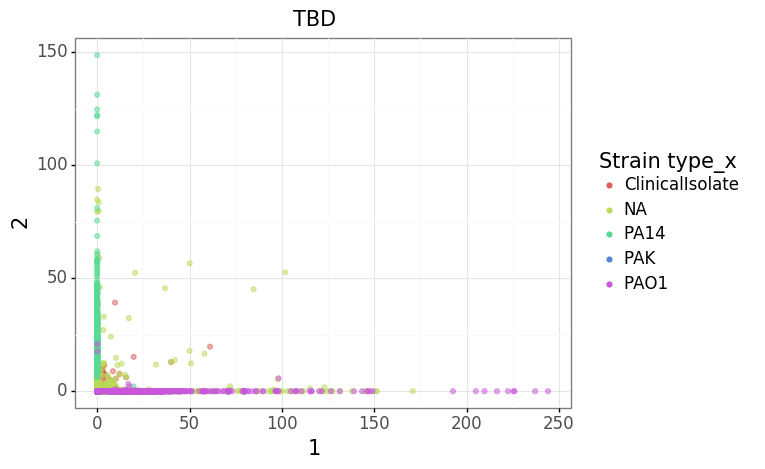

<ggplot: (8744763217313)>


In [23]:
# Plot
fig = pn.ggplot(
    pao1_pa14_acc_expression_label, 
    pn.aes(x='median acc expression_x', y='median acc expression_y'))
fig += pn.geom_point(pn.aes(color='Strain type_x'), alpha=0.5)
fig += pn.labs(x ='1',
            y = '2',
            title = 'TBD')
fig += pn.theme_bw()
fig += pn.theme(
    legend_title_align = "center",
    plot_background=pn.element_rect(fill='white'),
    legend_key=pn.element_rect(fill='white', colour='white'), 
    legend_title=pn.element_text(family='sans-serif', size=15),
    legend_text=pn.element_text(family='sans-serif', size=12),
    plot_title=pn.element_text(family='sans-serif', size=15),
    axis_text=pn.element_text(family='sans-serif', size=12),
    axis_title=pn.element_text(family='sans-serif', size=15)
    )
fig += pn.guides(colour=pn.guide_legend(override_aes={'alpha': 1}))

print(fig)

In [ ]:
# what are NA strains, difference with clinical isolates
# What are these results telling us?
# Does the merging make sense here -- look at what Deb said